In [1]:
import yfinance as yf
import pandas as pd
tesla_data = yf.download("TSLA", start="2010-01-01", end="2024-01-01")
tesla_data.reset_index(inplace=True)
tesla_data.head()


C:\Users\n tech\AppData\Local\Temp\ipykernel_2168\3188273087.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table") 
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[0].find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

tesla_revenue.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [3]:
import yfinance as yf
import pandas as pd
gme_data = yf.download("GME", start="2010-01-01", end="2024-01-01")
gme_data.reset_index(inplace=True)
gme_data.head()


C:\Users\n tech\AppData\Local\Temp\ipykernel_2168\1072043136.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854644,3.863061,3.703152,3.714934,26702800
1,2010-01-05,3.959005,3.996036,3.854643,3.856326,21269600
2,2010-01-06,4.044851,4.056634,3.908508,3.948906,21471200
3,2010-01-07,3.443930,3.563441,3.268872,3.368184,164761200
4,2010-01-08,3.415315,3.573541,3.405216,3.474229,47872400


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[1].find_all("tr")[1:]: 
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


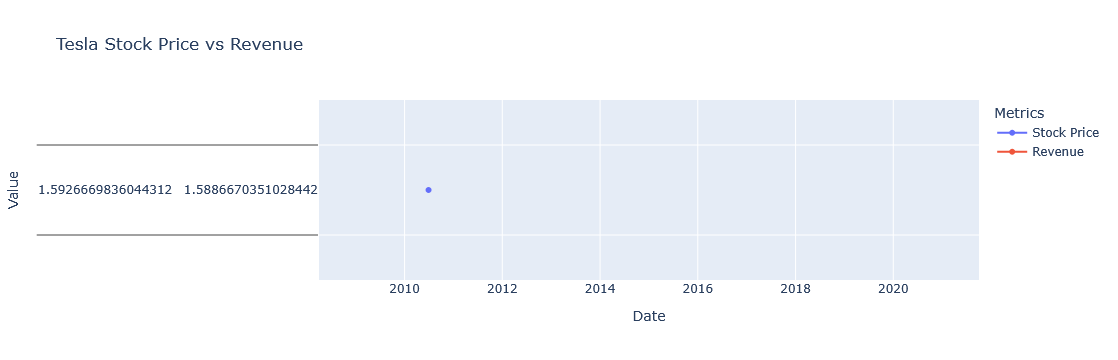

In [5]:
# Question 5 - Tesla Stock and Revenue Dashboard

import plotly.graph_objects as go

# Define the function to make stock vs revenue graph
def make_graph(stock_data, revenue_data, stock, title):
    fig = go.Figure()

    # Plot stock price
    fig.add_trace(go.Scatter(
        x=stock_data.Date,
        y=stock_data.Close,
        name="Stock Price"
    ))

    # Plot revenue
    fig.add_trace(go.Scatter(
        x=revenue_data.Date,
        y=revenue_data.Revenue.astype(float),
        name="Revenue"
    ))

    # Set graph title and labels
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Value",
        legend_title="Metrics",
        hovermode="x unified"
    )

    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla', 'Tesla Stock Price vs Revenue')


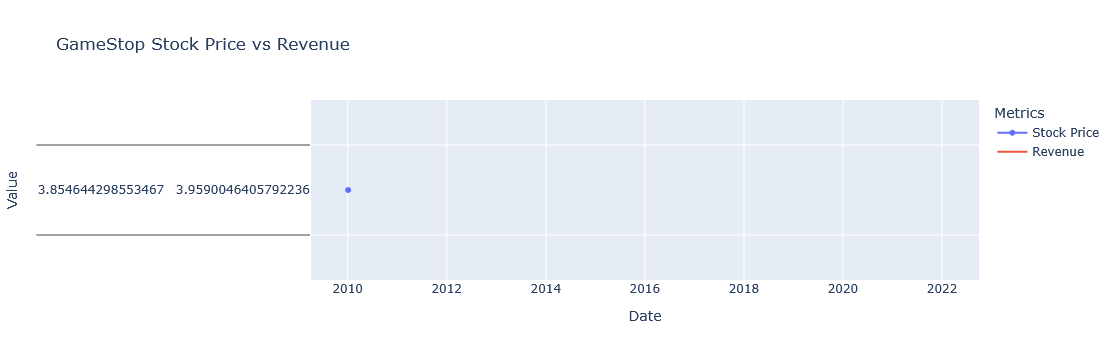

In [6]:
make_graph(gme_data, gme_revenue, 'GameStop', 'GameStop Stock Price vs Revenue')
